# US Housing Price Prediction using Simple Neural Network

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#load dataset
df = pd.read_csv("housing.csv")

In [3]:
#display first 5 data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
#check the dimension of the dataset
print("dim: "+str(df.shape))

dim: (2930, 81)


### we have 80 feature + 1 label and total 2930 rows with 81 columns

In [5]:
#check each column datatypes
df.dtypes.reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,int64,object,float64,int64,object,object,object,object,object,...,int64,object,object,object,int64,int64,int64,object,object,int64


In [6]:
#count each numerical and categorical datatypes
df.dtypes.value_counts()

object     43
int64      27
float64    11
dtype: int64

In [17]:
#check each non-numerical/categorical datatypes
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64'].index

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
#check the uniqueness of the dataset
idUnique = len(set(df.Id))
idTotal = df.shape[0]
idDuplicate = idTotal - idUnique
print("there are: "+str(idDuplicate)+" duplicate")

there are: 0 duplicate


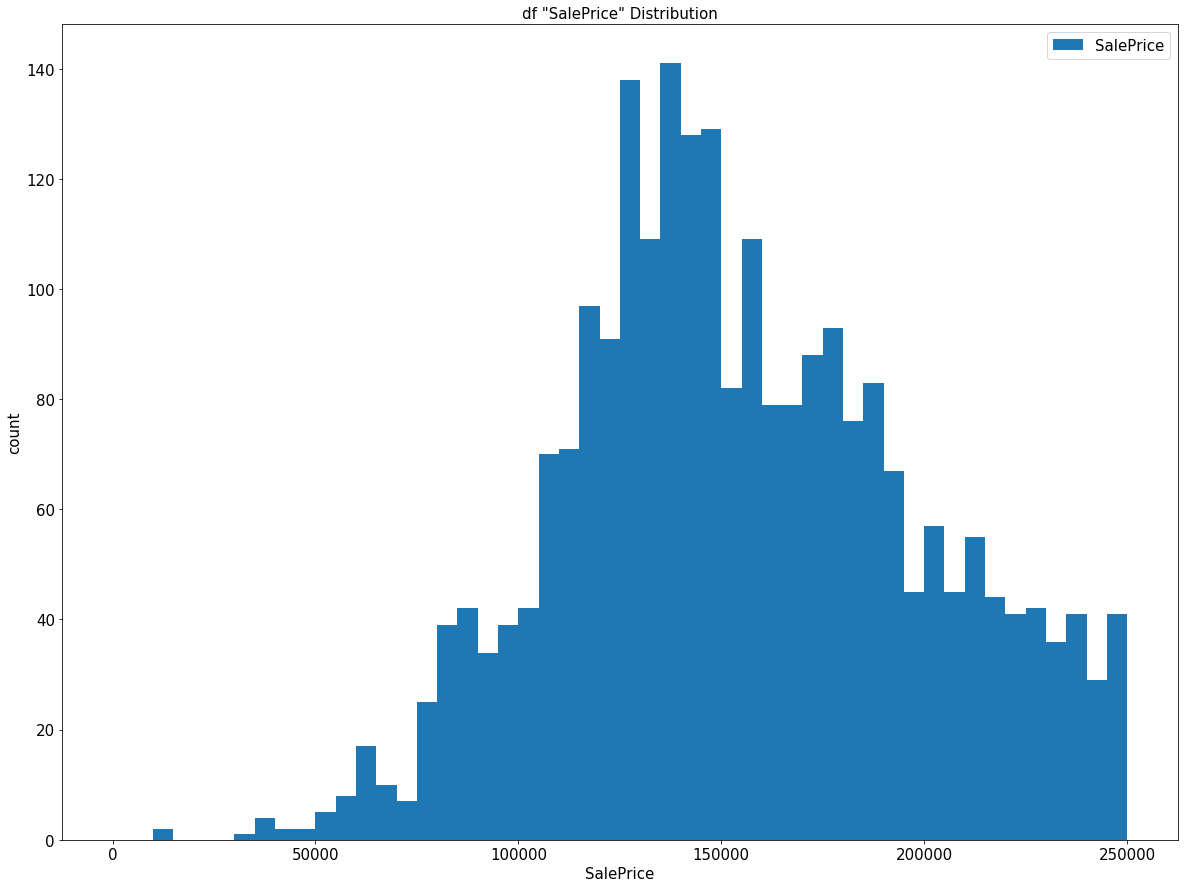

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
#check the price distribution of the dataset
plt.figure(figsize=(20, 15))
plt.hist(df['SalePrice'], bins=50, range=[0,250000], label='SalePrice')
plt.title('df \"SalePrice\" Distribution', fontsize=15)
plt.xlabel('SalePrice', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()
df['SalePrice'].describe()

### we can see that the min SalePrice is 12789 and the max SalePrice 755000 hence the data is distributed and also the concentatrion is high between 100000 to 150000 which would mean most of the buy's prefer that SalePrice

### now we are gonna dive deeper to knowing more about the dataset

In [189]:
fd = pd.read_csv("housing.csv")
fd.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2930.0,1465.500000,845.962470,1.0,733.25,1465.5,2197.75,2930.0
MSSubClass,2930.0,57.387372,42.638025,20.0,20.00,50.0,70.00,190.0
LotFrontage,2440.0,69.224590,23.365335,21.0,58.00,68.0,80.00,313.0
LotArea,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
OverallQual,2930.0,6.094881,1.411026,1.0,5.00,6.0,7.00,10.0
OverallCond,2930.0,5.563140,1.111537,1.0,5.00,5.0,6.00,9.0
YearBuilt,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
YearRemodAdd,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
MasVnrArea,2907.0,101.896801,179.112611,0.0,0.00,0.0,164.00,1600.0
BsmtFinSF1,2929.0,442.629566,455.590839,0.0,0.00,370.0,734.00,5644.0


##### 1. look at the BedroomAbvGr column, the dataset has a house where the house has 8 bedrooms, it seems to be a massive house or  a rented house and would be interesting to know more about it 
##### 2. we can see that the living area (GrLivAre) have min 505 and max 5642
##### 3.  most of the house built in 1970's and sold in 2000's, if we take a very simple argument, it takes approximately 30 years for a house to be sold, there must be a reason, the construction might take so long, it might  being rented, there might be a goverment rule or a history we didn't know
##### 4. we can infer that June is choosen as the most preferred month for buying a house 

In [6]:
#separate categorical and non-categorical datatypes
cat_fea = df.columns[df.dtypes == object]
num_fea = df.columns[df.dtypes != object]

In [7]:
#check any variable with missing values more than 15% of the dataset 
df[cat_fea].columns[df[cat_fea].isnull().sum()/df.shape[0] > 0.15]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
#drop the feature with missing values more than 15%
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

In [9]:
#define new categorical feature after dropping
cat_fea = df.columns[df.dtypes == object]
#check any categorical feature that still have missing values
cat_fea_null_col=df[cat_fea].columns[df[cat_fea].isnull().any()]
df[cat_fea][cat_fea_null_col].isnull().sum().sort_values()

Electrical        1
MasVnrType       23
BsmtQual         80
BsmtCond         80
BsmtFinType1     80
BsmtFinType2     81
BsmtExposure     83
GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
dtype: int64

In [10]:
#replace missing values for categorical feature using dummy variable via one-hot encoding
cat_fea = pd.get_dummies(cat_fea)
#check if there is still categorical feature that have missing values
cat_fea.isnull().values.sum()

0

In [11]:
#do the same with numerical feature
df = df.drop(['LotFrontage'], axis=1)

In [12]:
#define new numerical feature after dropping
num_fea = df[df.select_dtypes(exclude=['object']).columns]
#replace missing values for numerical feature using median of the dataset
num_fea = num_fea.fillna(num_fea.median())
#check if there is still numerical feature that have missing values
num_fea.isnull().values.sum()

0

In [13]:
#concatenate categorical and numerical feature
df = pd.concat([num_fea, cat_fea], axis = 1)
print("new feature number: " + str(df.shape[1]))
print("new df dim: " + str(df.shape))

new feature number: 75
new df dim: (2930, 75)


In [15]:
#find 10 most correlated numerical feature to target (SalePrice)
df_corr = df.corr()
print(df_corr.nlargest(10, 'SalePrice')['SalePrice'].index)
#count 10 most correlated numerical feature to target (SalePrice)
df_corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(df_corr.SalePrice)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'Exterior2nd', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'FullBath'],
      dtype='object')


### we have OverallQual and GrLivArea as the most correlated

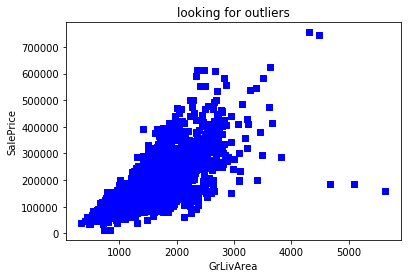

In [16]:
#looking for outliers
plt.scatter(df.GrLivArea, df.SalePrice, c = "blue", marker = "s")
plt.title("looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

### note that there are 2 outliers that have large GrLiveArea but very low SalePrice

In [17]:
#following the 2 outliers then we ignore all with GrLiveArea > 4000 since outliers very affect the prediction
df = df[df['GrLivArea'] < 4000]

In [76]:
#first model using linear regression

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']].values
y = df.SalePrice.values

lr = LinearRegression()
lr_fit = lr.fit(X,y)
kfold = KFold(n_splits=10, random_state=4, shuffle=True)
cross_val_score(lr_fit, X, y, cv=kfold, scoring='r2').mean()

0.8127495941335857

### we will try to improve on it

In [19]:
#second model using gradient bossing regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split=2, learning_rate=0.1, loss='ls')
gbr.fit(X,y)
gbr.score(X, y)

C:\Users\MOCH.REZA HABIBI\AppData\Local\conda\conda\envs\tensorflowsession\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.9809000302878609

## now I want to use simple neural network as the title above said

In [24]:
import tensorflow as tf

#define a sequential model
NN_model = tf.keras.Sequential()

#add some dense layers
#use normal as the kernel_initializer 
#use relu as the activation function for the hidden layers

#the input layer :
NN_model.add(tf.keras.layers.Dense(128, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

#the hidden layers :
NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal',activation='relu'))

#the output layer :
NN_model.add(tf.keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))

#compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

#summary the model
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [27]:
#define a checkpoint callback so that we can load the best checkpoint later
checkpoint_name = 'weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [54]:
#train the model
NN_model.fit(X, y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 2340 samples, validate on 585 samples
Epoch 1/500
1600/2340 [===================>..........] - ETA: 0s - loss: 23862.3965 - mean_absolute_error: 23862.3965
Epoch 00001: val_loss did not improve from 23044.39204
2340/2340 [==============================] - 1s 430us/step - loss: 23752.0425 - mean_absolute_error: 23752.0425 - val_loss: 24046.2938 - val_mean_absolute_error: 24046.2938
Epoch 2/500
1952/2340 [========================>.....] - ETA: 0s - loss: 24035.9780 - mean_absolute_error: 24035.9780
Epoch 00002: val_loss did not improve from 23044.39204
2340/2340 [==============================] - 0s 97us/step - loss: 24149.5275 - mean_absolute_error: 24149.5275 - val_loss: 23774.0923 - val_mean_absolute_error: 23774.0923
Epoch 3/500
1984/2340 [========================>.....] - ETA: 0s - loss: 24203.4710 - mean_absolute_error: 24203.4710
Epoch 00003: val_loss did not improve from 23044.39204
2340/2340 [==============================] - 0s 90us/step - loss: 24168.8048 - mean_absol

Epoch 25/500
2016/2340 [========================>.....] - ETA: 0s - loss: 23098.6618 - mean_absolute_error: 23098.6618
Epoch 00025: val_loss did not improve from 23044.39204
2340/2340 [==============================] - 0s 90us/step - loss: 23221.4321 - mean_absolute_error: 23221.4321 - val_loss: 23462.4186 - val_mean_absolute_error: 23462.4186
Epoch 26/500
1984/2340 [========================>.....] - ETA: 0s - loss: 23216.5409 - mean_absolute_error: 23216.5409
Epoch 00026: val_loss did not improve from 23044.39204
2340/2340 [==============================] - 0s 81us/step - loss: 23060.5887 - mean_absolute_error: 23060.5887 - val_loss: 23183.2810 - val_mean_absolute_error: 23183.2810
Epoch 27/500
2176/2340 [==========================>...] - ETA: 0s - loss: 23575.1496 - mean_absolute_error: 23575.1496
Epoch 00027: val_loss did not improve from 23044.39204
2340/2340 [==============================] - 0s 92us/step - loss: 23352.7284 - mean_absolute_error: 23352.7284 - val_loss: 27055.3280 

Epoch 49/500
1952/2340 [========================>.....] - ETA: 0s - loss: 24703.1822 - mean_absolute_error: 24703.1822
Epoch 00049: val_loss improved from 22971.58883 to 22824.87793, saving model to weights-049--22824.87793.hdf5
2340/2340 [==============================] - 0s 99us/step - loss: 24243.0964 - mean_absolute_error: 24243.0964 - val_loss: 22824.8779 - val_mean_absolute_error: 22824.8779
Epoch 50/500
1824/2340 [======================>.......] - ETA: 0s - loss: 24021.6024 - mean_absolute_error: 24021.6024
Epoch 00050: val_loss did not improve from 22824.87793
2340/2340 [==============================] - 0s 92us/step - loss: 24097.5160 - mean_absolute_error: 24097.5160 - val_loss: 23941.6046 - val_mean_absolute_error: 23941.6046
Epoch 51/500
1888/2340 [=======================>......] - ETA: 0s - loss: 23071.0294 - mean_absolute_error: 23071.0294
Epoch 00051: val_loss did not improve from 22824.87793
2340/2340 [==============================] - 0s 90us/step - loss: 23246.2031 - 

Epoch 96/500
2080/2340 [=========================>....] - ETA: 0s - loss: 24845.8185 - mean_absolute_error: 24845.8185
Epoch 00096: val_loss improved from 22516.62232 to 22384.22319, saving model to weights-096--22384.22319.hdf5
2340/2340 [==============================] - 0s 123us/step - loss: 24722.9423 - mean_absolute_error: 24722.9423 - val_loss: 22384.2232 - val_mean_absolute_error: 22384.2232
Epoch 97/500
1888/2340 [=======================>......] - ETA: 0s - loss: 22511.6946 - mean_absolute_error: 22511.6946
Epoch 00097: val_loss did not improve from 22384.22319
2340/2340 [==============================] - 0s 90us/step - loss: 22667.1683 - mean_absolute_error: 22667.1683 - val_loss: 23335.4908 - val_mean_absolute_error: 23335.4908
Epoch 98/500
2080/2340 [=========================>....] - ETA: 0s - loss: 24705.5950 - mean_absolute_error: 24705.5950
Epoch 00098: val_loss did not improve from 22384.22319
2340/2340 [==============================] - 0s 86us/step - loss: 24564.3875 -

2340/2340 [==============================] - 0s 111us/step - loss: 22914.0437 - mean_absolute_error: 22914.0437 - val_loss: 22226.2803 - val_mean_absolute_error: 22226.2803
Epoch 143/500
1920/2340 [=======================>......] - ETA: 0s - loss: 23211.7047 - mean_absolute_error: 23211.7047
Epoch 00143: val_loss did not improve from 22226.28027
2340/2340 [==============================] - 0s 90us/step - loss: 23232.1758 - mean_absolute_error: 23232.1758 - val_loss: 22534.5679 - val_mean_absolute_error: 22534.5679
Epoch 144/500
1952/2340 [========================>.....] - ETA: 0s - loss: 22024.8593 - mean_absolute_error: 22024.8593
Epoch 00144: val_loss did not improve from 22226.28027
2340/2340 [==============================] - 0s 87us/step - loss: 22353.2138 - mean_absolute_error: 22353.2138 - val_loss: 22408.9053 - val_mean_absolute_error: 22408.9053
Epoch 145/500
1984/2340 [========================>.....] - ETA: 0s - loss: 24001.6195 - mean_absolute_error: 24001.6195
Epoch 00145: 

Epoch 166/500
1984/2340 [========================>.....] - ETA: 0s - loss: 23850.9201 - mean_absolute_error: 23850.9201
Epoch 00166: val_loss did not improve from 21996.66732
2340/2340 [==============================] - 0s 87us/step - loss: 23499.2146 - mean_absolute_error: 23499.2146 - val_loss: 22521.6523 - val_mean_absolute_error: 22521.6523
Epoch 167/500
1952/2340 [========================>.....] - ETA: 0s - loss: 22413.7447 - mean_absolute_error: 22413.7447
Epoch 00167: val_loss did not improve from 21996.66732
2340/2340 [==============================] - 0s 88us/step - loss: 22605.2927 - mean_absolute_error: 22605.2927 - val_loss: 22368.9653 - val_mean_absolute_error: 22368.9653
Epoch 168/500
2016/2340 [========================>.....] - ETA: 0s - loss: 22350.4929 - mean_absolute_error: 22350.4929
Epoch 00168: val_loss did not improve from 21996.66732
2340/2340 [==============================] - 0s 85us/step - loss: 22634.8070 - mean_absolute_error: 22634.8070 - val_loss: 22995.60

Epoch 190/500
1792/2340 [=====================>........] - ETA: 0s - loss: 22663.9916 - mean_absolute_error: 22663.9916
Epoch 00190: val_loss did not improve from 21996.66732
2340/2340 [==============================] - 0s 95us/step - loss: 22449.9599 - mean_absolute_error: 22449.9599 - val_loss: 23349.0553 - val_mean_absolute_error: 23349.0553
Epoch 191/500
1952/2340 [========================>.....] - ETA: 0s - loss: 22105.4436 - mean_absolute_error: 22105.4436
Epoch 00191: val_loss did not improve from 21996.66732
2340/2340 [==============================] - 0s 81us/step - loss: 22373.5698 - mean_absolute_error: 22373.5698 - val_loss: 22258.0971 - val_mean_absolute_error: 22258.0971
Epoch 192/500
2048/2340 [=========================>....] - ETA: 0s - loss: 22946.3783 - mean_absolute_error: 22946.3783
Epoch 00192: val_loss did not improve from 21996.66732
2340/2340 [==============================] - 0s 93us/step - loss: 22963.2440 - mean_absolute_error: 22963.2440 - val_loss: 22032.54

Epoch 237/500
2336/2340 [============================>.] - ETA: 0s - loss: 22638.1618 - mean_absolute_error: 22638.1618
Epoch 00237: val_loss did not improve from 21392.75969
2340/2340 [==============================] - 0s 98us/step - loss: 22637.5546 - mean_absolute_error: 22637.5546 - val_loss: 22936.0852 - val_mean_absolute_error: 22936.0852
Epoch 238/500
1888/2340 [=======================>......] - ETA: 0s - loss: 21742.5737 - mean_absolute_error: 21742.5737
Epoch 00238: val_loss did not improve from 21392.75969
2340/2340 [==============================] - 0s 93us/step - loss: 22113.2958 - mean_absolute_error: 22113.2958 - val_loss: 25779.4498 - val_mean_absolute_error: 25779.4498
Epoch 239/500
1856/2340 [======================>.......] - ETA: 0s - loss: 22696.0795 - mean_absolute_error: 22696.0795
Epoch 00239: val_loss did not improve from 21392.75969
2340/2340 [==============================] - 0s 94us/step - loss: 22409.5600 - mean_absolute_error: 22409.5600 - val_loss: 23426.10

Epoch 261/500
2176/2340 [==========================>...] - ETA: 0s - loss: 22628.0238 - mean_absolute_error: 22628.0238
Epoch 00261: val_loss did not improve from 21053.08939
2340/2340 [==============================] - 0s 105us/step - loss: 22614.4065 - mean_absolute_error: 22614.4065 - val_loss: 24927.3574 - val_mean_absolute_error: 24927.3574
Epoch 262/500
2176/2340 [==========================>...] - ETA: 0s - loss: 22299.4933 - mean_absolute_error: 22299.4933
Epoch 00262: val_loss did not improve from 21053.08939
2340/2340 [==============================] - 0s 89us/step - loss: 22138.5250 - mean_absolute_error: 22138.5250 - val_loss: 21415.9131 - val_mean_absolute_error: 21415.9131
Epoch 263/500
2176/2340 [==========================>...] - ETA: 0s - loss: 21917.7170 - mean_absolute_error: 21917.7170
Epoch 00263: val_loss did not improve from 21053.08939
2340/2340 [==============================] - 0s 93us/step - loss: 21833.3363 - mean_absolute_error: 21833.3363 - val_loss: 25846.3

Epoch 285/500
1920/2340 [=======================>......] - ETA: 0s - loss: 21799.6872 - mean_absolute_error: 21799.6872
Epoch 00285: val_loss did not improve from 20955.34031
2340/2340 [==============================] - 0s 89us/step - loss: 22167.6616 - mean_absolute_error: 22167.6616 - val_loss: 24107.1849 - val_mean_absolute_error: 24107.1849
Epoch 286/500
1824/2340 [======================>.......] - ETA: 0s - loss: 22375.8395 - mean_absolute_error: 22375.8395
Epoch 00286: val_loss did not improve from 20955.34031
2340/2340 [==============================] - 0s 91us/step - loss: 21692.1476 - mean_absolute_error: 21692.1476 - val_loss: 22863.0029 - val_mean_absolute_error: 22863.0029
Epoch 287/500
1952/2340 [========================>.....] - ETA: 0s - loss: 22206.6133 - mean_absolute_error: 22206.6133
Epoch 00287: val_loss did not improve from 20955.34031
2340/2340 [==============================] - 0s 89us/step - loss: 22308.4631 - mean_absolute_error: 22308.4631 - val_loss: 22822.13

Epoch 309/500
1888/2340 [=======================>......] - ETA: 0s - loss: 21414.4009 - mean_absolute_error: 21414.4009
Epoch 00309: val_loss did not improve from 20955.34031
2340/2340 [==============================] - 0s 94us/step - loss: 21428.9038 - mean_absolute_error: 21428.9038 - val_loss: 21633.9640 - val_mean_absolute_error: 21633.9640
Epoch 310/500
2144/2340 [==========================>...] - ETA: 0s - loss: 21336.0449 - mean_absolute_error: 21336.0449
Epoch 00310: val_loss did not improve from 20955.34031
2340/2340 [==============================] - 0s 93us/step - loss: 21504.8150 - mean_absolute_error: 21504.8150 - val_loss: 21097.5010 - val_mean_absolute_error: 21097.5010
Epoch 311/500
2208/2340 [===========================>..] - ETA: 0s - loss: 22821.6713 - mean_absolute_error: 22821.6713
Epoch 00311: val_loss did not improve from 20955.34031
2340/2340 [==============================] - 0s 90us/step - loss: 22711.5178 - mean_absolute_error: 22711.5178 - val_loss: 26223.88

Epoch 333/500
1824/2340 [======================>.......] - ETA: 0s - loss: 21964.8998 - mean_absolute_error: 21964.8998
Epoch 00333: val_loss did not improve from 20898.66135
2340/2340 [==============================] - 0s 92us/step - loss: 22053.9699 - mean_absolute_error: 22053.9699 - val_loss: 21106.3222 - val_mean_absolute_error: 21106.3222
Epoch 334/500
2336/2340 [============================>.] - ETA: 0s - loss: 21582.3688 - mean_absolute_error: 21582.3688
Epoch 00334: val_loss did not improve from 20898.66135
2340/2340 [==============================] - 0s 122us/step - loss: 21559.6532 - mean_absolute_error: 21559.6532 - val_loss: 21917.6951 - val_mean_absolute_error: 21917.6951
Epoch 335/500
1920/2340 [=======================>......] - ETA: 0s - loss: 21557.2858 - mean_absolute_error: 21557.2858
Epoch 00335: val_loss did not improve from 20898.66135
2340/2340 [==============================] - 0s 92us/step - loss: 21649.3856 - mean_absolute_error: 21649.3856 - val_loss: 21897.7

Epoch 380/500
1952/2340 [========================>.....] - ETA: 0s - loss: 21319.6685 - mean_absolute_error: 21319.6685
Epoch 00380: val_loss did not improve from 20521.03629
2340/2340 [==============================] - 0s 90us/step - loss: 21509.4697 - mean_absolute_error: 21509.4697 - val_loss: 21387.0823 - val_mean_absolute_error: 21387.0823
Epoch 381/500
2016/2340 [========================>.....] - ETA: 0s - loss: 20806.9044 - mean_absolute_error: 20806.9044
Epoch 00381: val_loss did not improve from 20521.03629
2340/2340 [==============================] - 0s 86us/step - loss: 21187.2122 - mean_absolute_error: 21187.2122 - val_loss: 21593.9729 - val_mean_absolute_error: 21593.9729
Epoch 382/500
2240/2340 [===========================>..] - ETA: 0s - loss: 22949.0427 - mean_absolute_error: 22949.0427
Epoch 00382: val_loss did not improve from 20521.03629
2340/2340 [==============================] - 0s 97us/step - loss: 22751.1674 - mean_absolute_error: 22751.1674 - val_loss: 23543.51

Epoch 404/500
2336/2340 [============================>.] - ETA: 0s - loss: 21589.4147 - mean_absolute_error: 21589.4147
Epoch 00404: val_loss did not improve from 20506.73070
2340/2340 [==============================] - 0s 98us/step - loss: 21598.0595 - mean_absolute_error: 21598.0595 - val_loss: 21636.9370 - val_mean_absolute_error: 21636.9370
Epoch 405/500
1856/2340 [======================>.......] - ETA: 0s - loss: 22953.1918 - mean_absolute_error: 22953.1918
Epoch 00405: val_loss did not improve from 20506.73070
2340/2340 [==============================] - 0s 92us/step - loss: 22666.2599 - mean_absolute_error: 22666.2599 - val_loss: 21984.6156 - val_mean_absolute_error: 21984.6156
Epoch 406/500
1856/2340 [======================>.......] - ETA: 0s - loss: 21221.3120 - mean_absolute_error: 21221.3120
Epoch 00406: val_loss did not improve from 20506.73070
2340/2340 [==============================] - 0s 92us/step - loss: 21803.5291 - mean_absolute_error: 21803.5291 - val_loss: 21357.45

Epoch 00450: val_loss did not improve from 20186.21857
2340/2340 [==============================] - 0s 104us/step - loss: 22578.5891 - mean_absolute_error: 22578.5891 - val_loss: 20754.8539 - val_mean_absolute_error: 20754.8539
Epoch 451/500
2208/2340 [===========================>..] - ETA: 0s - loss: 20654.4384 - mean_absolute_error: 20654.4384
Epoch 00451: val_loss did not improve from 20186.21857
2340/2340 [==============================] - 0s 104us/step - loss: 20542.3611 - mean_absolute_error: 20542.3611 - val_loss: 20222.5295 - val_mean_absolute_error: 20222.5295
Epoch 452/500
2080/2340 [=========================>....] - ETA: 0s - loss: 21272.2265 - mean_absolute_error: 21272.2265
Epoch 00452: val_loss did not improve from 20186.21857
2340/2340 [==============================] - 0s 108us/step - loss: 21158.3979 - mean_absolute_error: 21158.3979 - val_loss: 20429.7145 - val_mean_absolute_error: 20429.7145
Epoch 453/500
1856/2340 [======================>.......] - ETA: 0s - loss: 2

Epoch 474/500
2144/2340 [==========================>...] - ETA: 0s - loss: 20821.2543 - mean_absolute_error: 20821.2543
Epoch 00474: val_loss did not improve from 19864.91529
2340/2340 [==============================] - 0s 123us/step - loss: 20913.3306 - mean_absolute_error: 20913.3306 - val_loss: 20178.5760 - val_mean_absolute_error: 20178.5760
Epoch 475/500
2048/2340 [=========================>....] - ETA: 0s - loss: 21674.1962 - mean_absolute_error: 21674.1962
Epoch 00475: val_loss did not improve from 19864.91529
2340/2340 [==============================] - 0s 129us/step - loss: 22073.7172 - mean_absolute_error: 22073.7172 - val_loss: 26197.8969 - val_mean_absolute_error: 26197.8969
Epoch 476/500
2144/2340 [==========================>...] - ETA: 0s - loss: 22521.1583 - mean_absolute_error: 22521.1583
Epoch 00476: val_loss did not improve from 19864.91529
2340/2340 [==============================] - 0s 135us/step - loss: 22409.3908 - mean_absolute_error: 22409.3908 - val_loss: 21445

Epoch 498/500
2016/2340 [========================>.....] - ETA: 0s - loss: 21339.5955 - mean_absolute_error: 21339.5955
Epoch 00498: val_loss did not improve from 19864.91529
2340/2340 [==============================] - 0s 114us/step - loss: 21859.6394 - mean_absolute_error: 21859.6394 - val_loss: 24054.2003 - val_mean_absolute_error: 24054.2003
Epoch 499/500
1952/2340 [========================>.....] - ETA: 0s - loss: 21026.7678 - mean_absolute_error: 21026.7678
Epoch 00499: val_loss did not improve from 19864.91529
2340/2340 [==============================] - 0s 116us/step - loss: 20777.1471 - mean_absolute_error: 20777.1471 - val_loss: 20589.9450 - val_mean_absolute_error: 20589.9450
Epoch 500/500
2016/2340 [========================>.....] - ETA: 0s - loss: 21599.9180 - mean_absolute_error: 21599.9180
Epoch 00500: val_loss did not improve from 19864.91529
2340/2340 [==============================] - 0s 114us/step - loss: 21580.0925 - mean_absolute_error: 21580.0925 - val_loss: 20667

In [55]:
#load files for weights of the best model

#choose the best checkpoint
weights = 'weights-469--19864.91529.hdf5'
#load it
NN_model.load_weights(weights) 
#compile it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [67]:
#test the model
NN = NN_model.predict(X)

### now we will compare the prediction of those three models with actual value

In [175]:
#make the dataframe for those three models
#lr_pred=pd.DataFrame({'LinearRegression': lr.predict(X)})
#gbr_pred=pd.DataFrame({'GradientBoostingRegressor': gbr.predict(X)})
#NN_model_pred=pd.DataFrame({'NN': NN_model.predict(X).flatten()})
#act_val=pd.DataFrame({'ActualValue': y})

#combine them
#pd.concat([act_val, lr_pred, gbr_pred, NN_model_pred], axis=1)

#make the dataframe
result = pd.DataFrame({'ActualValue': y, 'LinearRegression': lr.predict(X), 'GradientBoostingRegressor': gbr.predict(X), 'NN': NN_model.predict(X).flatten()})

#add ID
result.insert(loc=0, column='ID', value=range(1, result.shape[0]+1))

#save to csv
result.to_csv('result.csv', index=False)

In [179]:
#display first 5 data
result.head()

,ID,ActualValue,LinearRegression,GradientBoostingRegressor,NN
0,1,215000,198191.872471,199608.682454,184407.53125
1,2,105000,125582.898200,113378.731466,134365.15625
2,3,172000,172722.365657,166111.946403,167337.96875
3,4,244000,285034.596784,242772.335892,265211.28125
4,5,189900,155562.806288,173482.870771,167456.06250


#### we can see that for first 5 data GradientBoostingRegressor have the highest similarity (see completely result.csv for comparison)

###  how if we want to predict the OverallQual instead of the SalePrice?

In [176]:
from sklearn.model_selection import train_test_split

new_df = df[['SalePrice', 'GrLivArea', 'OverallQual']]
X_train, X_test, y_train, y_test = train_test_split(new_df, new_df.OverallQual, test_size = 0.2, random_state = 0)

#print("X_train: " + str(X_train.shape))
#print("X_test: " + str(X_test.shape))
#print("y_train: " + str(y_train.shape))
#print("y_test: " + str(y_test.shape))

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    learning_rate=1, random_state=3)
adb.fit(X_train, y_train)
adb.score(X_test, y_test)

1.0

### oopss, something goes wrong? let's match the prediction with actual value

In [178]:
y_pred = adb.predict(X_test)
y_pred_list = np.array(y_pred).tolist()

#printing first 5 predictions
print("the prediction:")
for i in range(0,5):
    print(y_pred_list[i])
    
#printing first 5 expectations
print("\nthe expectation:")
for i in range(0,5):
    print(y_test.iloc[i])

the prediction:
7
5
8
4
4

the expectation:
7
5
8
4
4


#### we can also predict the OverallCond